In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [2]:
# Chargement et affichage des 5 premières lignes du dataset
data = pd.read_csv(r'data_set\train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# On copie le dataset pour éviter de modifier l'original
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# vérification de la taille du dataset
df.shape

(614, 13)

In [6]:
# Verification des valeures manquantes et statistiques descriptives avancées
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantIncome       │   0 │     0 │     5403 │     6109 │  150 │  2878 │  3812 │  5795 │  81000 │   ▇    │  │
│ │ CoapplicantIncome     │   0 │     0 │     1621 │     2926 │    0 │     0 │  1188 │  2297 │  41670 │   ▇    │  │
│ │ LoanAmount            │  22 │  3.58 │    146.4 │    85.59 │    9 │   100 │   128 │   168 │    700 │  ▇▇▁   │  │
│ │ Loan_Amount_Term      │  14 │  2.28 │      342 │    65.12 │   12 │   360 │   360 │   360 │    480 │   ▁ ▇  │  │
│ │ Credit_History        │  50 │  8.14 │   0.8422 │   0.3649 │    0 │     1 │     1 │     1 │      1 │ ▁    ▇ │  │
│ └───────────────────────┴─────┴───────┴──────────┴──────────┴──────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
# On assigne les colonnes dans les variables catégorielles et numériques
features_cat = df.select_dtypes(include='object').columns
features_num = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
features_cat = features_cat.drop('Loan_ID')


In [9]:
print(features_cat)
print(features_num)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [10]:
# On remplace les valeurs manquantes de la variable categorielles par le mode
for value in features_cat:
    df[value] =df[value].fillna(df[value].mode()[0])

In [11]:
# On remplace les valeurs manquantes de la variable numériques par la médiane
for value in features_num:
    df[value] =df[value].fillna(df[value].median())

In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantIncome       │   0 │     0 │    5403 │    6109 │  150 │   2878 │  3812 │   5795 │  81000 │   ▇    │  │
│ │ CoapplicantIncome     │   0 │     0 │    1621 │    2926 │    0 │      0 │  1188 │   2297 │  41670 │   ▇    │  │
│ │ LoanAmount            │   0 │     0 │   145.8 │   84.11 │    9 │  100.2 │   128 │  164.8 │    700 │  ▇▇▁   │  │
│ │ Loan_Amount_Term      │   0 │     0 │   342.4 │   64.43 │   12 │    360 │   360 │    360 │    480 │   ▁ ▇  │  │
│ │ Credit_History        │   0 │     0 │   0.855 │  0.3523 │    0 │      1 │     1 │      1 │      1 │ ▁    ▇ │  │
│ └───────────────────────┴─────┴───────┴─────────┴─────────┴──────┴────────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │      0 │          0 │                           1 │                     614 │  │
│ │ Married                      │      0 │          0 │                           1 │                     614 │  │
│ │ Dependents                   │      0 │          0 │                           1 │                     614 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │      0 │          0 │                           1 │                     614 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

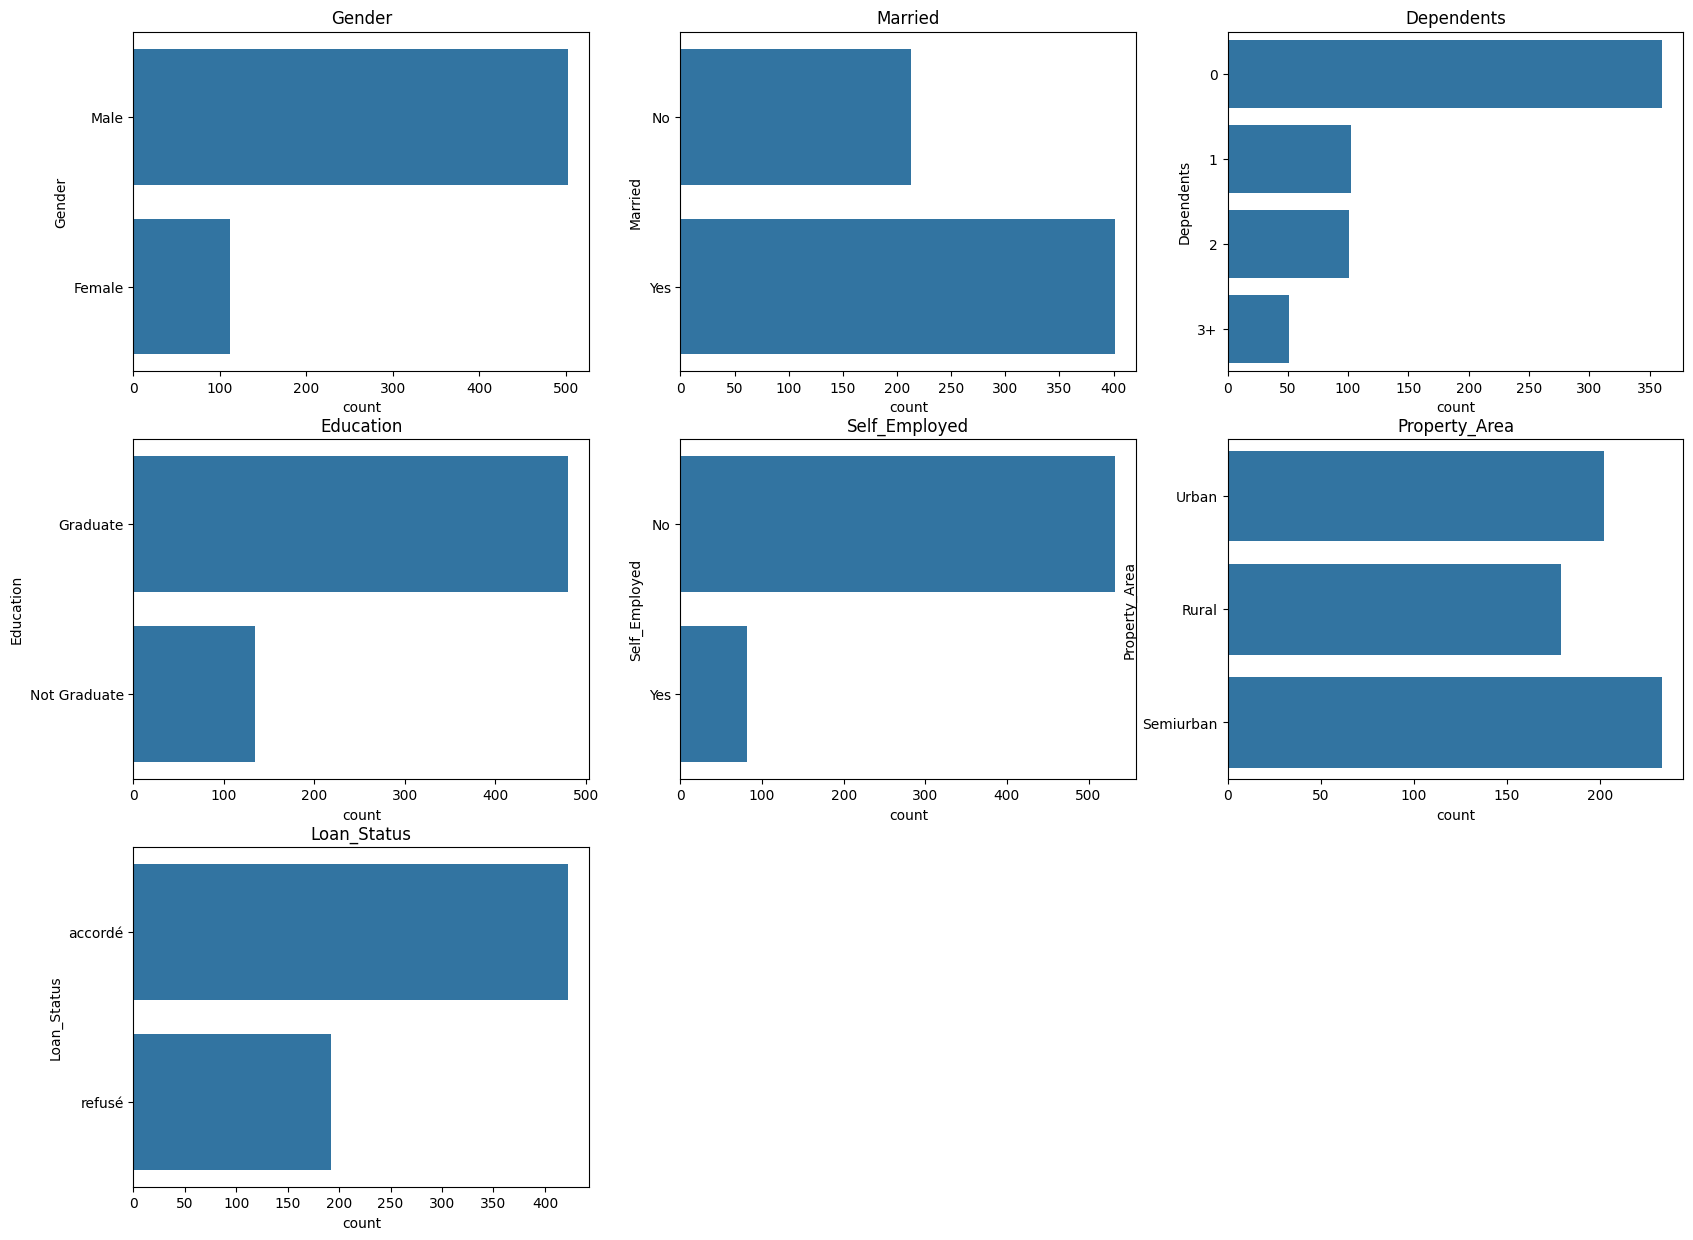

In [17]:
# Analyse univariée
# On affiche la distribution des variables catégorielles
plt.figure(figsize=(20, 15))
for i, col in enumerate(features_cat, 1):
    plt.subplot(3, 3, i)
    sns.countplot(df[col])
    plt.title(col)

In [15]:
# Remplacement des valeurs de la variable cible par des valeurs plus explicites (accordé, refusé) avec np.where et np.select 
conditions = [
    df['Loan_Status'].isin(['Y', 'N'])
]
values = [
    np.where(df['Loan_Status'] == 'Y', 'accordé', 'refusé')
]

# np.where pour remplacer les valeurs
df['Loan_Status'] = np.select(conditions, values, default='inconnu')

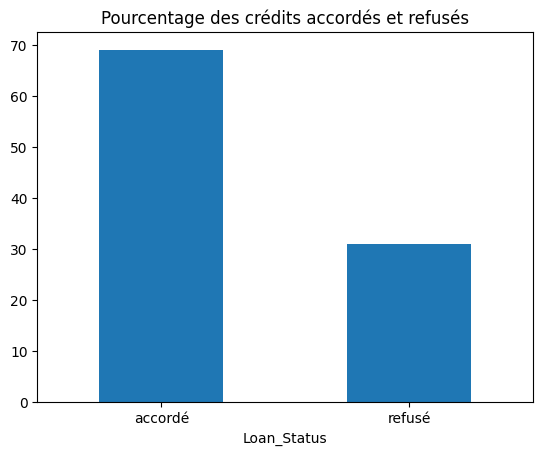

In [24]:
# Distribution de la variable cible en pourcentage
loan_status = round(df['Loan_Status'].value_counts(normalize=True) * 100, 0).plot(kind='bar', title='Pourcentage des crédits accordés et refusés', rot=0)